In [1]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import resample
from tensorflow.keras.layers import Dropout
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns

In [2]:
#a# Reading the CSV file into the two-dimensional array "data"
# using numpy's function genfromtxt
data=np.genfromtxt('glass.data.csv',delimiter=',')
print(data)

[[  1.        1.52101  13.64    ...   0.        0.        1.     ]
 [  2.        1.51761  13.89    ...   0.        0.        1.     ]
 [  3.        1.51618  13.53    ...   0.        0.        1.     ]
 ...
 [212.        1.52065  14.36    ...   1.64      0.        7.     ]
 [213.        1.51651  14.38    ...   1.57      0.        7.     ]
 [214.        1.51711  14.23    ...   1.67      0.        7.     ]]


In [3]:
#Printing the shape of data set (glass.data)
print(data.shape)

(214, 11)


In [4]:
#b# Prepare the data

# Creating X features matrix
X=data[:,1:10]

#Storing output in y
y=np.copy(data[:,10:])
y=y.astype('int')
y=np.ravel(y)

#Printing shapes of X and y matrices
print('Shape of X features matrix is:',X.shape)
print('Shape of y matrix is:',y.shape)

#Printing X and y matrices
print('Features matrix X','\n',X)
print('Matrix y','\n',y)

Shape of X features matrix is: (214, 9)
Shape of y matrix is: (214,)
Features matrix X 
 [[ 1.52101 13.64     4.49    ...  8.75     0.       0.     ]
 [ 1.51761 13.89     3.6     ...  7.83     0.       0.     ]
 [ 1.51618 13.53     3.55    ...  7.78     0.       0.     ]
 ...
 [ 1.52065 14.36     0.      ...  8.44     1.64     0.     ]
 [ 1.51651 14.38     0.      ...  8.48     1.57     0.     ]
 [ 1.51711 14.23     0.      ...  8.62     1.67     0.     ]]
Matrix y 
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]


In [5]:
#c# printing the first 5 rows of the features array X "data"
print("Printing first five rows of features array")
X[:5,:]

Printing first five rows of features array


array([[1.52101e+00, 1.36400e+01, 4.49000e+00, 1.10000e+00, 7.17800e+01,
        6.00000e-02, 8.75000e+00, 0.00000e+00, 0.00000e+00],
       [1.51761e+00, 1.38900e+01, 3.60000e+00, 1.36000e+00, 7.27300e+01,
        4.80000e-01, 7.83000e+00, 0.00000e+00, 0.00000e+00],
       [1.51618e+00, 1.35300e+01, 3.55000e+00, 1.54000e+00, 7.29900e+01,
        3.90000e-01, 7.78000e+00, 0.00000e+00, 0.00000e+00],
       [1.51766e+00, 1.32100e+01, 3.69000e+00, 1.29000e+00, 7.26100e+01,
        5.70000e-01, 8.22000e+00, 0.00000e+00, 0.00000e+00],
       [1.51742e+00, 1.32700e+01, 3.62000e+00, 1.24000e+00, 7.30800e+01,
        5.50000e-01, 8.07000e+00, 0.00000e+00, 0.00000e+00]])

In [6]:
#d# Printing unique values of matrix y
print(np.unique(y))

[1 2 3 5 6 7]


In [7]:
# Summary statistics
mean_vals = np.mean(X, axis=0) #Mean 
std_dev = np.std(X, axis=0)  #Standard deviation
min_vals = np.min(X, axis=0) #Minimum values
max_vals = np.max(X, axis=0) #Maximum values

print('Mean Values:', np.round(mean_vals, 4))
print('Standard Deviation:', np.round(std_dev,4))
print('Min Values:', np.round(min_vals, 4))
print('Max Values:', np.round(max_vals,4))

Mean Values: [1.51840e+00 1.34079e+01 2.68450e+00 1.44490e+00 7.26509e+01 4.97100e-01
 8.95700e+00 1.75000e-01 5.70000e-02]
Standard Deviation: [0.003  0.8147 1.439  0.4981 0.7727 0.6507 1.4198 0.4961 0.0972]
Min Values: [ 1.5112 10.73    0.      0.29   69.81    0.      5.43    0.      0.    ]
Max Values: [ 1.5339 17.38    4.49    3.5    75.41    6.21   16.19    3.15    0.51  ]


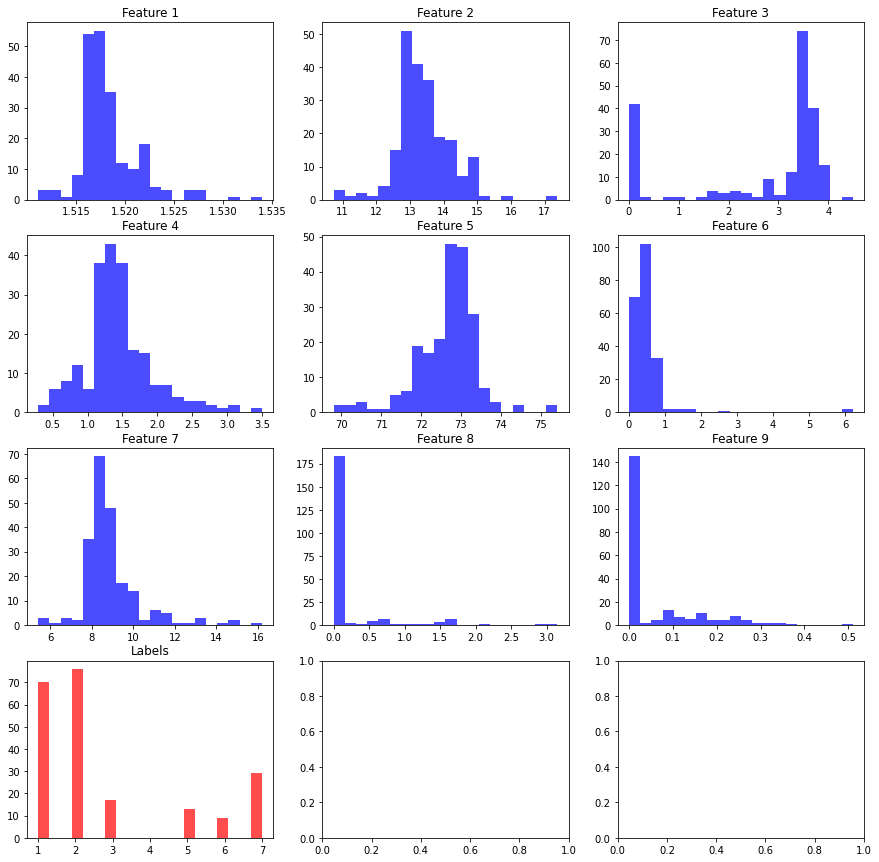

In [8]:
# Visualization
fig, axs = plt.subplots(4, 3, figsize=(15, 15))

# Plotting the histogram for each feature
counter = 0
for i in range(4):
    for j in range(3):
        counter = counter + 1
        if counter > X.shape[1]: break
        axs[i, j].hist(X[:, counter-1], bins=20, color='blue', alpha=0.7) 
        axs[i, j].set_title(f'Feature {counter}')

# Plotting histogram for labels
axs[3, 0].hist(y, bins=20, color='red', alpha=0.7)
axs[3, 0].set_title('Labels')

plt.show()

<Figure size 1440x1440 with 0 Axes>

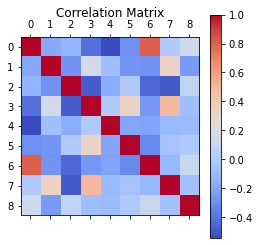

In [9]:
# Calculate the correlation matrix
cor_matrix = np.corrcoef(X, rowvar=False)  #rowvar to make it along columns

# Plot the correlation matrix
plt.figure(figsize=(20, 20))
cax = plt.matshow(cor_matrix, cmap='coolwarm')
plt.colorbar(cax)
plt.title('Correlation Matrix', pad=20)
plt.show()


In [10]:
encoder = OneHotEncoder(sparse=False)
y_enc = encoder.fit_transform(y.reshape(-1, 1))
print(y_enc.shape)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_enc, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


(214, 6)


In [11]:
# Build the neural network model
model = Sequential()

# Add layers to the model
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
#model.add(Dropout(0.5)) 
model.add(Dense(16, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(len(set(y)), activation='softmax'))


# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 102       
Total params: 950
Trainable params: 950
Non-trainable params: 0
_________________________________________________________________
None


Epoch 1/100
5/5 [==============================] - 1s 101ms/step - loss: 1.8767 - accuracy: 0.1029 - val_loss: 1.7368 - val_accuracy: 0.1714
Epoch 2/100
5/5 [==============================] - 0s 11ms/step - loss: 1.8087 - accuracy: 0.1544 - val_loss: 1.6965 - val_accuracy: 0.2857
Epoch 3/100
5/5 [==============================] - 0s 11ms/step - loss: 1.7556 - accuracy: 0.2353 - val_loss: 1.6605 - val_accuracy: 0.4286
Epoch 4/100
5/5 [==============================] - 0s 10ms/step - loss: 1.7048 - accuracy: 0.3235 - val_loss: 1.6335 - val_accuracy: 0.4571
Epoch 5/100
5/5 [==============================] - 0s 10ms/step - loss: 1.6624 - accuracy: 0.3750 - val_loss: 1.6087 - val_accuracy: 0.4857
Epoch 6/100
5/5 [==============================] - 0s 9ms/step - loss: 1.6233 - accuracy: 0.3971 - val_loss: 1.5838 - val_accuracy: 0.5429
Epoch 7/100
5/5 [==============================] - 0s 9ms/step - loss: 1.5877 - accuracy: 0.4044 - val_loss: 1.5612 - val_accuracy: 0.5143
Epoch 8/100
5/5 [====

Epoch 59/100
5/5 [==============================] - 0s 10ms/step - loss: 0.7296 - accuracy: 0.7500 - val_loss: 1.3457 - val_accuracy: 0.6286
Epoch 60/100
5/5 [==============================] - 0s 13ms/step - loss: 0.7219 - accuracy: 0.7500 - val_loss: 1.3435 - val_accuracy: 0.6286
Epoch 61/100
5/5 [==============================] - 0s 12ms/step - loss: 0.7144 - accuracy: 0.7574 - val_loss: 1.3477 - val_accuracy: 0.6286
Epoch 62/100
5/5 [==============================] - 0s 11ms/step - loss: 0.7089 - accuracy: 0.7574 - val_loss: 1.3548 - val_accuracy: 0.6000
Epoch 63/100
5/5 [==============================] - 0s 11ms/step - loss: 0.7014 - accuracy: 0.7574 - val_loss: 1.3582 - val_accuracy: 0.6000
Epoch 64/100
5/5 [==============================] - 0s 11ms/step - loss: 0.6943 - accuracy: 0.7721 - val_loss: 1.3598 - val_accuracy: 0.6000
Epoch 65/100
5/5 [==============================] - 0s 11ms/step - loss: 0.6875 - accuracy: 0.7794 - val_loss: 1.3614 - val_accuracy: 0.6571
Epoch 66/100


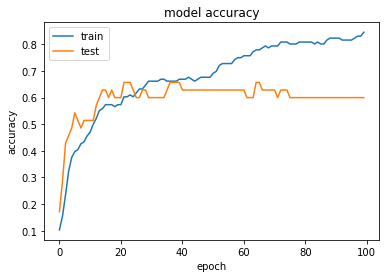

In [12]:
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Visualize Model Training History
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


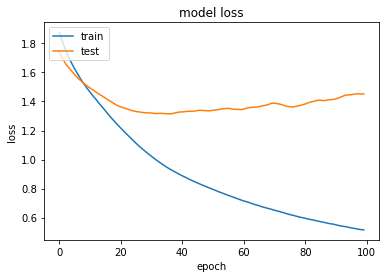

In [13]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [14]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

predictions = model.predict (X_test)
print(predictions.shape, y_test.shape)

2/2 [==============================] - 0s 3ms/step - loss: 14.7388 - accuracy: 0.3256
Test Loss: 14.738795280456543
Test Accuracy: 0.3255814015865326
(43, 6) (43, 6)


In [15]:
from sklearn.metrics import confusion_matrix, classification_report

conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(predictions, axis=1))
print(conf_matrix)

c_report = classification_report(np.argmax(y_test, axis=1), np.argmax(predictions, axis=1))
print(c_report)




[[ 0 11  0  0  0  0]
 [ 0 14  0  0  0  0]
 [ 0  3  0  0  0  0]
 [ 0  4  0  0  0  0]
 [ 0  3  0  0  0  0]
 [ 0  8  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.33      1.00      0.49        14
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         8

    accuracy                           0.33        43
   macro avg       0.05      0.17      0.08        43
weighted avg       0.11      0.33      0.16        43



When the model is trained with 32 neurons in first dense layer and 16 neurons in second dense layer the model accuracy, test accuracy, test loss, classification report and confusion matrix is below. 

Here the model accuracy is high but the on the test data it is low, we can claerly observe the model is getting overfitted and it is able to predict only the '1' in the test day and other data is predicted wrong 

Epoch 100/100
5/5 [==============================] - 0s 10ms/step - loss: 0.5153 - accuracy: 0.8456 - val_loss: 1.4523 - val_accuracy: 0.6000

2/2 [==============================] - 0s 3ms/step - loss: 14.7388 - accuracy: 0.3256
Test Loss: 14.738795280456543
Test Accuracy: 0.3255814015865326
(43, 6) (43, 6)



[[ 0 11  0  0  0  0]
 [ 0 14  0  0  0  0]
 [ 0  3  0  0  0  0]
 [ 0  4  0  0  0  0]
 [ 0  3  0  0  0  0]
 [ 0  8  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.33      1.00      0.49        14
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         8

    accuracy                           0.33        43
   macro avg       0.05      0.17      0.08        43
weighted avg       0.11      0.33      0.16        43

Below is the test accuracy, classification report and confusion matrix for the model when we use the 32 neurons in first dense layer and added dropout of 0.5 percent and it is followed by the other dense layer of 16 neurons and dropout of 0.5 percent 

After adding the dropout to the model the accuracy of the model is decreased but the test accuracy is increased as it minimized the overfitting of the model 


2/2 [==============================] - 0s 3ms/step - loss: 3.0653 - accuracy: 0.4884
Test Loss: 3.0652849674224854
Test Accuracy: 0.4883720874786377
(43, 6) (43, 6)




[[ 0 11  0  0  0  0]
 [ 0 14  0  0  0  0]
 [ 0  3  0  0  0  0]
 [ 0  3  0  0  0  1]
 [ 0  2  0  0  0  1]
 [ 0  1  0  0  0  7]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.41      1.00      0.58        14
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         3
           5       0.78      0.88      0.82         8

    accuracy                           0.49        43
   macro avg       0.20      0.31      0.23        43
weighted avg       0.28      0.49      0.34        43

      Id        A      B     C     D      E     F     G     H    I  Glass_type
0      1  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0           1
1      2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0           1
2      3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0           1
3      4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0           1
4      5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0           1
..   ...      ...    ...   ...   ...    ...   ...   ...   ...  ...         ...
209  210  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0           7
210  211  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0           7
211  212  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0           7
212  213  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0           7
213  214  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0           7

[214 rows x 11 columns]


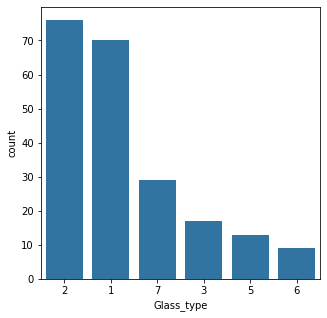

In [20]:
#Reading the data from excel into dataframe and assiging labels 
df=pd.read_csv('glass.data.csv',header=None)
df.columns=['Id','A','B','C',\
'D','E','F','G','H','I','Glass_type']
print(df)

#Plotting the count of the output class 
plt.figure(figsize=(5,5))
sns.countplot(x='Glass_type', data=df, order=df['Glass_type'].value_counts().index);


In the given data set their are 6 unique outputs but most of the data given is showing the features of class type 1 and 2 whereas for the other classes the data is limited and also we can observe that the correlation is between the features is also less.

As we can see from the distribution of classes, the classes are imbalanced, thus if we construct a model of an unbalanced dataset, the model will bias towards the class containing the majority of the samples, so dealing with imbalance classes will aid in the development of a fair model.

If we deal with the imbalances we can build a model which increased prediction capability.We can do this by resampling the data and shuffling it using imblearn libraray or the other way is collect more data to make the model accurate 